In [ ]:
import pandas as pd
df=pd.read_csv('/content/housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x=df.iloc[:,0:10]
y=df.iloc[:,10]

In [ ]:
x

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,8450,7,5,856,2,1,3,8,0,548
1,9600,6,8,1262,2,0,3,6,1,460
2,11250,7,5,920,2,1,3,6,1,608
3,9550,7,5,756,1,0,3,7,1,642
4,14260,8,5,1145,2,1,4,9,1,836
...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460
1456,13175,6,6,1542,2,0,3,7,2,500
1457,9042,7,9,1152,2,0,4,9,2,252
1458,9717,5,6,1078,1,0,2,5,0,240


In [ ]:
y

0       1
1       1
2       1
3       0
4       1
       ..
1455    1
1456    1
1457    1
1458    0
1459    0
Name: AboveMedianPrice, Length: 1460, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaler=scaler.fit_transform(x)
x_scaler

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
x_scaler[40]

array([0.03439202, 0.55555556, 0.5       , 0.17806874, 0.66666667,
       0.        , 0.375     , 0.33333333, 0.33333333, 0.31029619])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=1)


In [ ]:
model=Sequential()

In [ ]:
input_layer=Dense(20,input_shape=(10,))
model.add(input_layer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                220       
                                                                 
Total params: 220 (880.00 Byte)
Trainable params: 220 (880.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hidden_layer1=Dense(30,activation='relu')
model.add(hidden_layer1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 30)                630       
                                                                 
Total params: 850 (3.32 KB)
Trainable params: 850 (3.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hidden_layer2=Dense(30,activation='relu')
model.add(hidden_layer2)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 30)                630       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
Total params: 1780 (6.95 KB)
Trainable params: 1780 (6.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
output_layer=Dense(1,activation='sigmoid')
model.add(output_layer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 30)                630       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1811 (7.07 KB)
Trainable params: 1811 (7.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
hist=model.fit(x_train,y_train,epochs=150,batch_size=20,validation_data=(x_test,y_test))

Epoch 1/150
59/59 [==============================] - 0s 4ms/step - loss: 0.2356 - accuracy: 0.9084 - val_loss: 0.2193 - val_accuracy: 0.9178
Epoch 2/150
59/59 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.8998 - val_loss: 0.2191 - val_accuracy: 0.9247
Epoch 3/150
59/59 [==============================] - 0s 3ms/step - loss: 0.2368 - accuracy: 0.9041 - val_loss: 0.2285 - val_accuracy: 0.8733
Epoch 4/150
59/59 [==============================] - 0s 4ms/step - loss: 0.2393 - accuracy: 0.8955 - val_loss: 0.2201 - val_accuracy: 0.8904
Epoch 5/150
59/59 [==============================] - 0s 4ms/step - loss: 0.2365 - accuracy: 0.9050 - val_loss: 0.2234 - val_accuracy: 0.8801
Epoch 6/150
59/59 [==============================] - 0s 4ms/step - loss: 0.2367 - accuracy: 0.9058 - val_loss: 0.2184 - val_accuracy: 0.9041
Epoch 7/150
59/59 [==============================] - 0s 3ms/step - loss: 0.2389 - accuracy: 0.8973 - val_loss: 0.2190 - val_accuracy: 0.8973
Epoch 8/150
5

In [ ]:
print(val_loss)
print(val_acc)

0.21946997940540314
0.9246575236320496


In [ ]:
#make prediction
lst=[[8450,7,5,856,2,1,3,8,0,548]]
z=scaler.transform(lst)
print(z)
result=model.predict(z)
print(result)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[[0.0334198  0.66666667 0.5        0.1400982  0.66666667 0.5
  0.375      0.5        0.         0.3864598 ]]
1/1 [==============================] - 0s 188ms/step
[[0.9647772]]


In [ ]:
if result>=0.5:
  print('1')
else:
  print('0')

1


In [ ]:
lst1=[[6543,8,4,734,1,0,2,6,1,534]]
a=scaler.transform(lst1)
print(a)
result1=model.predict(a)
print(result1)

[[0.0245063  0.77777778 0.375      0.12013093 0.33333333 0.
  0.25       0.33333333 0.33333333 0.37658674]]
1/1 [==============================] - 0s 22ms/step
[[0.42535126]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
if result1>=0.5:
  print('1')
else:
  print('0')

0


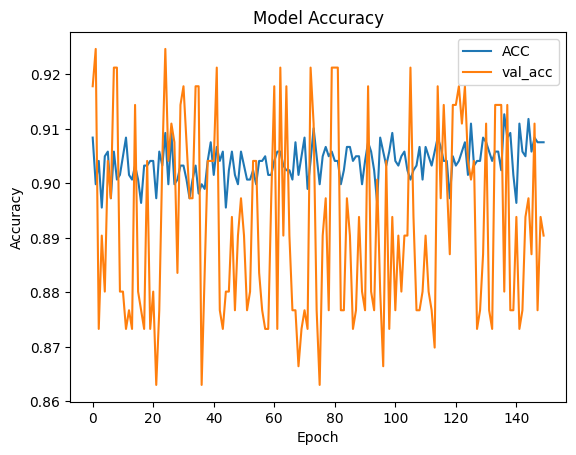

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],label='ACC')
plt.plot(hist.history['val_accuracy'],label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

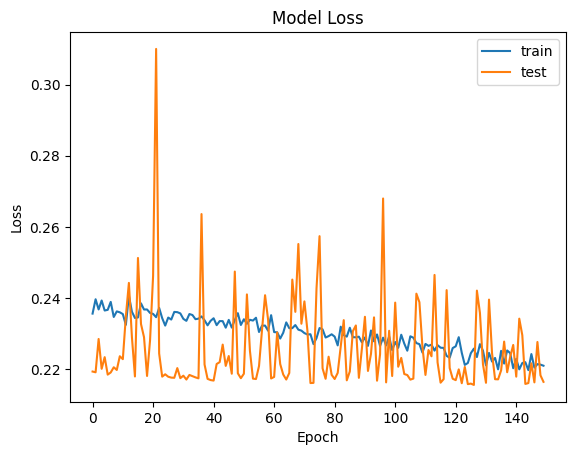

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()